In [0]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
# Common imports
import numpy as np
import os
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    try:
        plt.savefig(path, format=fig_extension, dpi=resolution)
    except:
        plt.savefig(fig_id + "." + fig_extension, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
pd.options.display.max_columns = None

In [3]:
github_p = "https://raw.githubusercontent.com/Finance-781/FinML/master/Lecture%202%20-%20End-to-End%20ML%20Project%20/Practice/"

df = pd.read_csv(github_p+'datasets/sydney_airbnb.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (36,54,55) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,11156,https://www.airbnb.com/rooms/11156,An Oasis in the City,Very central to the city which can be reached ...,Potts Pt. is a vibrant and popular inner-city...,Very central to the city which can be reached ...,"It is very close to everything and everywhere,...","$150.00 key security deposit, refundable on re...",It is 7 minutes walk to the Kings Cross.train ...,Kitchen & laundry facilities. Shared bathroom.,As much as they want.,Be considerate. No showering after 2330h.,https://a0.muscache.com/im/pictures/2797669/17...,40855,https://www.airbnb.com/users/show/40855,Colleen,23/09/09,"Potts Point, New South Wales, Australia","Recently retired, I've lived & worked on 4 con...",within a day,67%,t,https://a0.muscache.com/im/users/40855/profile...,https://a0.muscache.com/im/users/40855/profile...,Potts Point,1.0,1.0,"['email', 'phone', 'reviews']",t,f,"Potts Point, NSW, Australia",Potts Point,Sydney,NaN,Potts Point,NSW,2011,Sydney,"Potts Point, Australia",AU,Australia,-33.869168,151.226562,t,Apartment,Private room,1,NaN,1.0,1.0,Real Bed,"{TV,Kitchen,Elevator,""Buzzer/wireless intercom...",NaN,$65.00,NaN,NaN,NaN,NaN,1,$0.00,2,180,4 weeks ago,t,9,39,69,339,177,5/12/09,1/07/18,92.0,9.0,9.0,10.0,10.0,10.0,9.0,f,moderate,f,f,1,1.69
1,12351,https://www.airbnb.com/rooms/12351,Sydney City & Harbour at the door,Come stay with Vinh & Stuart (Awarded as one o...,"We're pretty relaxed hosts, and we fully appre...",Come stay with Vinh & Stuart (Awarded as one o...,"Pyrmont is an inner-city village of Sydney, on...",We've a few reasons for the 6.00pm arrival tim...,Our home is centrally located and an easy walk...,We look forward to welcoming you just as we wo...,As much or as little as you like. We live here...,We look forward to welcoming you to stay you j...,https://a0.muscache.com/im/pictures/763ad5c8-c...,17061,https://www.airbnb.com/users/show/17061,Stuart,14/05/09,"Sydney, New South Wales, Australia","G'Day from Australia!\r\n\r\nHe's Vinh, and I'...",within an hour,100%,f,https://a0.muscache.com/im/users/17061/profile...,https://a0.muscache.com/im/users/17061/profile...,Pyrmont,2.0,2.0,"['email', 'phone', 'manual_online', 'reviews',...",t,t,"Pyrmont, NSW, Australia",Pyrmont,Sydney,NaN,Pyrmont,NSW,2009,Sydney,"Pyrmont, Australia",AU,Australia,-33.865153,151.191896,t,Townhouse,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",""Paid par...",NaN,$98.00,$800.00,NaN,$0.00,$55.00,2,$395.00,2,7,yesterday,t,13,30,45,188,468,24/07/10,27/06/18,95.0,10.0,9.0,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period,t,t,2,4.83
2,14250,https://www.airbnb.com/rooms/14250,Manly Harbour House,"Beautifully renovated, spacious and quiet, our...",Our home is a thirty minute walk along the sea...,"Beautifully reno

In [5]:
# To get detailed summary of data
print ("Rows     : " , df.shape[0])
print ("Columns  : " , df.shape[1])
print ("\nFeatures : \n" , df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  27070
Columns  :  84

Features : 
 ['id', 'listing_url', 'name', 'summary', 'space', 'description', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum

In [0]:
incl = ["price","city","longitude","latitude","review_scores_rating","number_of_reviews","minimum_nights","security_deposit","cleaning_fee",
        "accommodates","bathrooms","bedrooms","beds","property_type","room_type","availability_365" ,"host_identity_verified", 
        "host_is_superhost","host_since","cancellation_policy"] 

In [0]:
df1=df[incl]

In [8]:
df1.head()

,price,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy
0,$65.00,Potts Point,151.226562,-33.869168,92.0,177,2,NaN,NaN,1,NaN,1.0,1.0,Apartment,Private room,339,f,t,23/09/09,moderate
1,$98.00,Pyrmont,151.191896,-33.865153,95.0,468,2,$0.00,$55.00,2,1.0,1.0,1.0,Townhouse,Private room,188,t,f,14/05/09,strict_14_with_grace_period
2,$469.00,Balgowlah,151.261722,-33.800929,100.0,1,5,$900.00,$100.00,6,3.0,3.0,3.0,House,Entire home/apt,168,t,f,20/11/09,strict_14_with_grace_period
3,$63.00,Redfern,151.200450,-33.890765,89.0,172,2,NaN,NaN,2,1.0,1.0,1.0,Apartment,Private room,215,t,f,30/11/09,moderate
4,$39.00,Redfern,151.200896,-33.889667,90.0,147,2,NaN,NaN,1,2.0,1.0,1.0,Apartment,Shared room,287,t,f,30/11/09,moderate


In [9]:
# To get detailed summary of data
print ("Rows     : " , df1.shape[0])
print ("Columns  : " , df1.shape[1])
print ("\nFeatures : \n" , df1.columns.tolist())
print ("\nMissing values :  ", df1.isnull().sum().values.sum())
print ("\nUnique values :  \n",df1.nunique())

Rows     :  27070
Columns  :  20

Features : 
 ['price', 'city', 'longitude', 'latitude', 'review_scores_rating', 'number_of_reviews', 'minimum_nights', 'security_deposit', 'cleaning_fee', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'property_type', 'room_type', 'availability_365', 'host_identity_verified', 'host_is_superhost', 'host_since', 'cancellation_policy']

Missing values :   25927

Unique values :  
 price                       735
city                        741
longitude                 26864
latitude                  27041
review_scores_rating         49
number_of_reviews           266
minimum_nights               68
security_deposit            272
cleaning_fee                328
accommodates                 16
bathrooms                    18
bedrooms                     12
beds                         18
property_type                39
room_type                     3
availability_365            366
host_identity_verified        2
host_is_superhost             2
host_s

In [10]:
df1.describe()

,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,accommodates,bathrooms,bedrooms,beds,availability_365
count,27070.000000,27070.000000,19512.000000,27070.000000,27070.000000,27070.000000,27048.000000,27062.000000,27037.000000,27070.000000
mean,151.210667,-33.862368,93.412413,14.005689,4.504211,3.383598,1.352337,1.614071,2.012169,102.128999
std,0.079451,0.072260,9.354959,29.808917,14.550036,2.196864,0.664092,1.109725,1.526399,128.116451
min,150.644964,-34.135212,20.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,151.184472,-33.897603,90.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000
50%,151.223242,-33.883064,96.000000,3.000000,2.000000,2.000000,1.000000,1.000000,1.000000,32.500000
75%,151.264889,-33.831850,100.000000,13.000000,5.000000,4.000000,1.500000,2.000000,2.000000,179.000000
max,151.339811,-33.389728,100.000000,468.000000,1000.000000,16.000000,10.000000,46.000000,29.000000,365.000000


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27070 entries, 0 to 27069
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   27070 non-null  object 
 1   city                    27037 non-null  object 
 2   longitude               27070 non-null  float64
 3   latitude                27070 non-null  float64
 4   review_scores_rating    19512 non-null  float64
 5   number_of_reviews       27070 non-null  int64  
 6   minimum_nights          27070 non-null  int64  
 7   security_deposit        16722 non-null  object 
 8   cleaning_fee            19250 non-null  object 
 9   accommodates            27070 non-null  int64  
 10  bathrooms               27048 non-null  float64
 11  bedrooms                27062 non-null  float64
 12  beds                    27037 non-null  float64
 13  property_type           27070 non-null  object 
 14  room_type               27070 non-null

In [12]:
# Importing regex
import re

# The price fields in our data frame
price_list = ["price","cleaning_fee","security_deposit"]

# We change any blanks to 0 and use our regex function to remove anything that isn't a number (or negative number which is changed to 0)
for col in price_list:
    df1[col] = df1[col].fillna("0")
    df1[col] = df1[col].apply(lambda x: float(re.compile('[^0-9eE.]').sub('', x)) if len(x)>0 else 0)

df1['host_since'] = pd.to_datetime(df1['host_since'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [13]:
df1.describe()

,price,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,availability_365
count,27070.000000,27070.000000,27070.000000,19512.000000,27070.000000,27070.000000,27070.000000,27070.000000,27070.000000,27048.000000,27062.000000,27037.000000,27070.000000
mean,209.278796,151.210667,-33.862368,93.412413,14.005689,4.504211,305.766679,66.674178,3.383598,1.352337,1.614071,2.012169,102.128999
std,304.336271,0.079451,0.072260,9.354959,29.808917,14.550036,591.491850,88.246098,2.196864,0.664092,1.109725,1.526399,128.116451
min,0.000000,150.644964,-34.135212,20.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,80.000000,151.184472,-33.897603,90.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000
50%,135.000000,151.223242,-33.883064,96.000000,3.000000,2.000000,0.000000,40.000000,2.000000,1.000000,1.000000,1.000000,32.500000
75%,229.000000,151.264889,-33.831850,100.000000,13.000000,5.000000,450.000000,100.000000,4.000000,1.500000,2.000000,2.000000,179.000000
max,12999.000000,151.339811,-33.389728,100.000000,468.000000,1000.000000,7000.000000,999.000000,16.000000,10.000000,46.000000,29.000000,365.000000


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


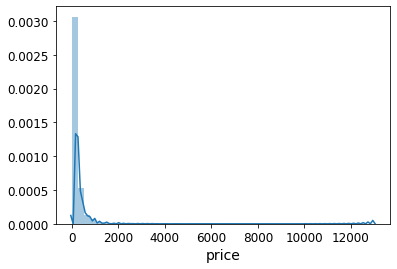

In [15]:
sns.distplot(df1['price'])

In [16]:
df1['price'].skew()

13.808558337216192

In [17]:
df1['price'].kurtosis()

413.4301463784445

In [18]:
print(df1["price"].quantile(0.996))
print(df1["price"].mean())
print(df1["price"].median())

1849.0
209.27879571481344
135.0


In [0]:
df2 = df1[df1["price"]<df1["price"].quantile(0.995)].reset_index(drop=True)

In [20]:
df2['price'].skew()

2.957872457159033

In [21]:
df2['price'].kurtosis()

11.18710844862683

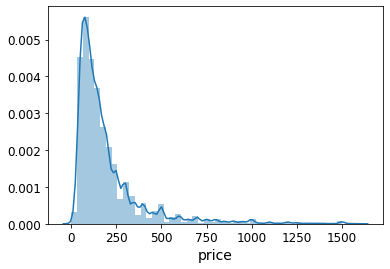

In [22]:
sns.distplot(df2['price'])

In [23]:
df2.isnull().sum()

price                        0
city                        32
longitude                    0
latitude                     0
review_scores_rating      7466
number_of_reviews            0
minimum_nights               0
security_deposit             0
cleaning_fee                 0
accommodates                 0
bathrooms                   22
bedrooms                     8
beds                        33
property_type                0
room_type                    0
availability_365             0
host_identity_verified      34
host_is_superhost           34
host_since                  34
cancellation_policy          0
dtype: int64

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

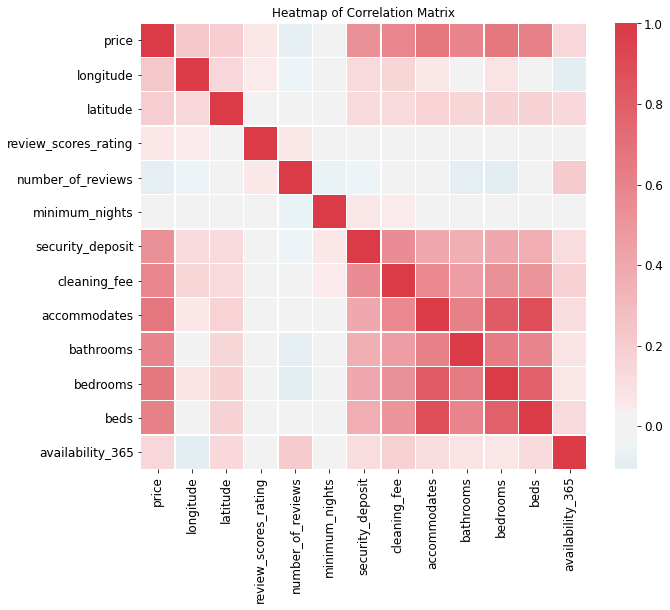

In [24]:
# Now let's explore our correlation matrix

corr_matrix = df2.corr()

# Heatmap
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220,10,as_cmap = True)

#Deep dive into diverging_pattern
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns.values,
           yticklabels=corr_matrix.columns.values, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

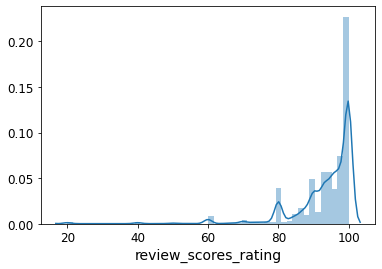

In [25]:
sns.distplot(df2['review_scores_rating'])

In [0]:
mode = df2["review_scores_rating"].median()
df2["review_scores_rating"].fillna(mode, inplace=True) # option 3


In [27]:
df3.isnull().sum()

NameError: ignored

In [28]:
df2.head()

,price,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy
0,65.0,Potts Point,151.226562,-33.869168,92.0,177,2,0.0,0.0,1,NaN,1.0,1.0,Apartment,Private room,339,f,t,2009-09-23,moderate
1,98.0,Pyrmont,151.191896,-33.865153,95.0,468,2,0.0,55.0,2,1.0,1.0,1.0,Townhouse,Private room,188,t,f,2009-05-14,strict_14_with_grace_period
2,469.0,Balgowlah,151.261722,-33.800929,100.0,1,5,900.0,100.0,6,3.0,3.0,3.0,House,Entire home/apt,168,t,f,2009-11-20,strict_14_with_grace_period
3,63.0,Redfern,151.200450,-33.890765,89.0,172,2,0.0,0.0,2,1.0,1.0,1.0,Apartment,Private room,215,t,f,2009-11-30,moderate
4,39.0,Redfern,151.200896,-33.889667,90.0,147,2,0.0,0.0,1,2.0,1.0,1.0,Apartment,Shared room,287,t,f,2009-11-30,moderate


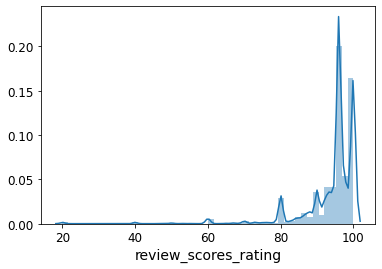

In [29]:
sns.distplot(df2['review_scores_rating'])

In [0]:
df3=df2.drop(["review_scores_rating"], axis=1) 

In [31]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26931 entries, 0 to 26930
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   price                   26931 non-null  float64       
 1   city                    26899 non-null  object        
 2   longitude               26931 non-null  float64       
 3   latitude                26931 non-null  float64       
 4   number_of_reviews       26931 non-null  int64         
 5   minimum_nights          26931 non-null  int64         
 6   security_deposit        26931 non-null  float64       
 7   cleaning_fee            26931 non-null  float64       
 8   accommodates            26931 non-null  int64         
 9   bathrooms               26909 non-null  float64       
 10  bedrooms                26923 non-null  float64       
 11  beds                    26898 non-null  float64       
 12  property_type           26931 non-null  object

In [0]:
df3=df3.dropna()

In [33]:
# We now remove the rare occurences in categories as it's necessary for the cross validation step
# the below step is somewhat similar for what has been done with cities above

# We store the counts of each type in the variable item_counts
item_counts = df3.groupby(['property_type']).size()

# Store a list of the rare property types here i.e. the types that have a count less than 10 
rare_items = list(item_counts.loc[item_counts <= 10].index.values)

# drop the property types that were rare
df3 = df3[~df3["property_type"].isin(rare_items)].reset_index(drop=True)

# Sanity check
df3["property_type"].value_counts()

Apartment             15837
House                  7684
Townhouse              1136
Condominium             350
Guest suite             350
Guesthouse              287
Villa                   201
Loft                    173
Bed and breakfast       155
Other                   147
Bungalow                118
Cabin                    77
Serviced apartment       74
Cottage                  60
Hostel                   53
Boutique hotel           25
Boat                     16
Hotel                    13
Tent                     13
Name: property_type, dtype: int64

In [34]:
## For this taks we will keep the top 20 Sydney locations

list_of_20 = list(df3["city"].value_counts().head(20).index)
df3 = df3[df3["city"].isin(list_of_20)].reset_index(drop=True)
df3['city'].value_counts()

Bondi Beach       1666
Manly              952
Surry Hills        918
Bondi              783
Randwick           683
Coogee             674
Sydney             672
Darlinghurst       650
North Bondi        629
Newtown            489
Redfern            478
Maroubra           441
Paddington         440
Bondi Junction     416
Mosman             384
Potts Point        377
Bronte             363
Pyrmont            305
Waterloo           300
Glebe              259
Name: city, dtype: int64

In [35]:
df3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11879 entries, 0 to 11878
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   price                   11879 non-null  float64       
 1   city                    11879 non-null  object        
 2   longitude               11879 non-null  float64       
 3   latitude                11879 non-null  float64       
 4   number_of_reviews       11879 non-null  int64         
 5   minimum_nights          11879 non-null  int64         
 6   security_deposit        11879 non-null  float64       
 7   cleaning_fee            11879 non-null  float64       
 8   accommodates            11879 non-null  int64         
 9   bathrooms               11879 non-null  float64       
 10  bedrooms                11879 non-null  float64       
 11  beds                    11879 non-null  float64       
 12  property_type           11879 non-null  object

In [36]:
print(df3['room_type'].value_counts())
print(df3['cancellation_policy'].value_counts())


Entire home/apt    7670
Private room       4026
Shared room         183
Name: room_type, dtype: int64
strict_14_with_grace_period    5419
flexible                       3552
moderate                       2883
super_strict_60                  25
Name: cancellation_policy, dtype: int64


In [0]:
#### Now let's create some new features

df3["bedrooms_per_person"] = df3["bedrooms"]/df3["accommodates"]
df3["bathrooms_per_person"] = df3["bathrooms"]/df3["accommodates"]
df3['host_since'] = pd.to_datetime(df3['host_since'])
df3['days_on_airbnb'] = (pd.to_datetime('today') - df3['host_since']).dt.days

In [39]:
from sklearn.preprocessing import OneHotEncoder

X_cat = df3.select_dtypes(include=[object]).columns
df4 = pd.get_dummies(df3, columns=X_cat, drop_first=True)
df4.head()

,price,longitude,latitude,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,availability_365,host_since,bedrooms_per_person,bathrooms_per_person,days_on_airbnb,city_Bondi Beach,city_Bondi Junction,city_Bronte,city_Coogee,city_Darlinghurst,city_Glebe,city_Manly,city_Maroubra,city_Mosman,city_Newtown,city_North Bondi,city_Paddington,city_Potts Point,city_Pyrmont,city_Randwick,city_Redfern,city_Surry Hills,city_Sydney,city_Waterloo,property_type_Bed and breakfast,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Condominium,property_type_Cottage,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Loft,property_type_Other,property_type_Serviced apartment,property_type_Tent,property_type_Townhouse,property_type_Villa,room_type_Private room,room_type_Shared room,host_identity_verified_t,host_is_superhost_t,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_60
0,98.0,151.191896,-33.865153,468,2,0.0,55.0,2,1.0,1.0,1.0,188,2009-05-14,0.500000,0.500000,4020,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0
1,63.0,151.200450,-33.890765,172,2,0.0,0.0,2,1.0,1.0,1.0,215,2009-11-30,0.500000,0.500000,3820,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
2,39.0,151.200896,-33.889667,147,2,0.0,0.0,1,2.0,1.0,1.0,287,2009-11-30,1.000000,2.000000,3820,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0
3,111.0,151.216541,-33.880455,272,2,0.0,0.0,2,1.0,1.0,1.0,285,2009-03-12,0.500000,0.500000,4083,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
4,700.0,151.274506,-33.889087,53,4,1500.0,370.0,11,3.0,5.0,7.0,255,2010-08-14,0.454545,0.272727,3563,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0


In [0]:
df4=df4.drop(["host_since"], axis=1) 

In [0]:
# Train test split

from sklearn.model_selection import train_test_split

# We remove the label values from our training data
X = df4.drop(['price'],axis=1).values

# We assigned those label values to our Y dataset
y = df4['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
score = model.score(X_test, y_test)


lin_mse = mean_squared_error(y_test, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse


106.8911067824383

In [43]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=89)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
score = model.score(X_test, y_test)


lin_mse = mean_squared_error(y_test, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse


102.60047290273724

In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit( X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [45]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)
    
print("")
print("Best grid-search performance: ", np.sqrt(-cvres["mean_test_score"].max()))

127.64665564655283 {'max_features': 2, 'n_estimators': 3}
111.15905786291191 {'max_features': 2, 'n_estimators': 10}
106.01440130542028 {'max_features': 2, 'n_estimators': 30}
120.85654838394683 {'max_features': 4, 'n_estimators': 3}
108.18192106114 {'max_features': 4, 'n_estimators': 10}
104.605238837229 {'max_features': 4, 'n_estimators': 30}
118.15415294909386 {'max_features': 6, 'n_estimators': 3}
106.45498507102467 {'max_features': 6, 'n_estimators': 10}
102.61003977726745 {'max_features': 6, 'n_estimators': 30}
120.51439921457437 {'max_features': 8, 'n_estimators': 3}
107.29229908778774 {'max_features': 8, 'n_estimators': 10}
102.70639032044895 {'max_features': 8, 'n_estimators': 30}
126.49878143524232 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
111.18465565286564 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
122.36046580296215 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
107.71465575955364 {'bootstrap': False, 'max_features': 3, 'n_esti

In [46]:
model = grid_search.best_estimator_
model.fit(X_train, y_train)

predictions = model.predict(X_test)
score = model.score(X_test, y_test)


lin_mse = mean_squared_error(y_test, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse


102.27671313345338

RangeIndex(start=0, stop=57, step=1)

In [0]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

feats = pd.DataFrame()
feats["Name"] = list(df4.drop(["price"], axis=1).columns)
feats["Score"] = feature_importances

In [56]:
feats.sort_values("Score",ascending=False).round(5).head(20)

,Name,Score
8,bedrooms,0.14487
6,accommodates,0.11556
9,beds,0.09849
5,cleaning_fee,0.08281
4,security_deposit,0.07104
7,bathrooms,0.06900
0,longitude,0.04344
12,bathrooms_per_person,0.04268
1,latitude,0.04144
13,days_on_airbnb,0.03446
